Implementing Guassian Mixture Model to get a better picture of how the algorithm works.

[]

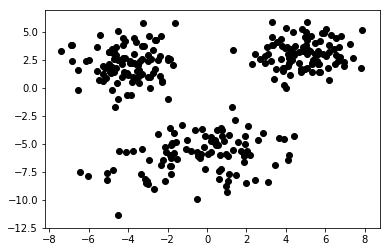

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.linalg
import scipy.stats


#Training Data
training_data = np.zeros((300,2))
n = len(training_data)
k = 3
m = 2

training_data[0:100] = scipy.stats.multivariate_normal([-4,2],[[2,0],[0,2]]).rvs(100)
training_data[100:200] = scipy.stats.multivariate_normal([5,3],[[1.5,0],[0,1.5]]).rvs(100)
training_data[200:300] = scipy.stats.multivariate_normal([0,-6],[[5,1],[1,3]]).rvs(100)

for i in range(n):
    plt.scatter(training_data[i,0], training_data[i,1], c="black")
plt.plot()

In [2]:
def invertible(a):
    try:
        test_inverse = np.linalg.inv(a)
        return True
    except Exception as inst:
        print(type(inst))    # the exception instance
        return False
    #return a.shape[0] == a.shape[1] and np.linalg.matrix_rank(a) == a.shape[0]

pi = np.random.rand((k))
pi /= np.sum(pi) #Randomly initialize pi so that the elements sum to 1

mu = np.zeros((k,m))
sigma = np.zeros((k,m,m))
cluster = np.zeros((n)) #List to keep track of cluster assigned to each data sample
probabilities = np.zeros((n,k)) #Pij for each data sample
num_of_iter = 0 #Keep track of the number of iterations the algorithm takes
converged = False #Variable to test if algorithm has converged

#Randomly initialize mu and sigma for each cluster
for i in range(3):
    mu[i] = [np.random.rand()*16-8,np.random.rand()*15-10] #Random Mean Vector
    eigval = np.random.rand(m) #Random POSITIVE eigenvalues
    q, _ = scipy.linalg.qr(np.random.rand(m, m)) #Random rotation matrix
    sigma[i] = q.T @ np.diag(eigval) @ q #Random Positive-Semidefinite Covariance Matrix
    
#Expectation Maximaiztion Algorithm
while not converged:
    #Estimation Step: Calculating P_ij vector for each data sample (Probability that data sample i belongs in cluster j)
    for i in range(n):
        px = 0
        for j in range(k):
            probabilities[i,j] = pi[j]*scipy.stats.multivariate_normal(mu[j], sigma[j]).pdf(training_data[i])
        px = sum(probabilities[i])
        probabilities[i] /= px
    
    #Maximization Step: Updating pi, mu, and sigma
    for j in range(k):
        p_j = sum(probabilities[:,j]) #The sum of all the probabilities that a training data belongs in cluster j
        pi[j] = p_j/n #Updating pi[j]
        
        '''Matrix Methods
        mu[j] = sum(training_data.T @ probabilities[:,j])/p_j
        sigma[j] = sum((training_data-mu[j]).T @ (training_data-mu[j]))/p_j
        print(mu[j], sigma[j])
        '''
        
        #Resets mu and sigma for next iteration
        mu[j] -= mu[j]
        sigma[j] -= sigma[j]
        
        for i in range(n):
            mu[j] += probabilities[i,j]*training_data[i] #Numerator of mu update equation
            temp = (training_data[i]-mu[j]/p_j) #Helper variable for sigma calculation
            sigma[j] += probabilities[i,j]*np.outer(temp,temp.T)#Numerator of sigma update equation
        mu[j] /= p_j 
        sigma[j] /= p_j
       
    num_of_iter += 1
    
    #Conditions for Convergence
    for j in range(k):
        if not invertible(sigma[j]):
            converged = True #Reaches Minimum (maybe local)
    if (num_of_iter == 30):
        converged = True #Iteration Cap

for i in range(n):
    cluster[i] = int(np.argmax(probabilities[i])) #Assigning training sample i to cluster with highest probability of containing it

print("Expectation-Maximization Algorithm for GMM converged after", num_of_iter, "iterations")

Expectation-Maximization Algorithm for GMM converged after 30 iterations


[]

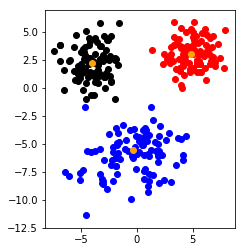

In [3]:
#Plotting data for 3 clusters
for z in range(n):
    if cluster[z] == 0:
        plt.scatter(training_data[z,0], training_data[z,1], c="black")    
    elif cluster[z] == 1:
        plt.scatter(training_data[z,0], training_data[z,1], c="blue")
    elif cluster[z] == 2:
        plt.scatter(training_data[z,0], training_data[z,1], c="red")
for y in range(k):
    plt.scatter(mu[y,0], mu[y,1], c="orange")
plt.gca().set_aspect('equal', adjustable='box')
plt.plot() 